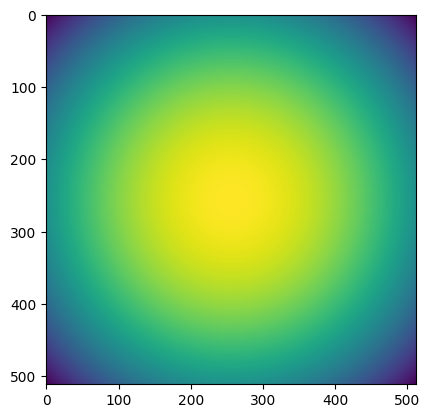

In [1]:
import tamaas as tm
import matplotlib.pyplot as plt

import tamaas.utils
import numpy as np

# parallel computation
tm.initialize(8)

# discretization
n = 512 #[256, 512, 1024]



##load(constant)
W = 1e0  # Total load

L = 1.  # Domain size
Radius = 0.01

physical_size = [L, L]
discritization = [n, n]
model = tm.Model(tm.model_type.basic_2d, physical_size, discritization)

model.E = 3
model.nu = 0.5

E_star = model.E / (1 - model.nu**2)

shear_modulus = [model.mu]
characteristic_time = [1] 


#We apply analytical solution in Hertz contact
surface = tm.utils.hertz_surface(physical_size, discritization,Radius)

plt.imshow(surface)

In [2]:
G_inf = model.mu
G = shear_modulus

print('G_inf:', G_inf, ' G: ' + str(G))

tau = characteristic_time#[1]#[0.1, 1] #relaxation time
eta = [g * t for g, t in zip(G, tau)]

print('tau:', tau, ' eta: ' + str(eta))

nu = 0.5



Ac_Johnson_ref = []
g_1 = 2*(G[0] + G_inf)
g_2 = -g_1*(2*G_inf/(2*G_inf-g_1))

e_1 = 2 * (G[0] + G_inf) * (1+model.nu)
K = 2 * G_inf * (1+model.nu)
tau_c = [t*e_1/K for t in tau]

tau_c

G_inf: 1.0  G: [1.0]
tau: [1]  eta: [1.0]


[2.0]

In [3]:
Ac_tamaas = []

#solve for target pressure
p_target = W / (L**2) #avarge pressure
#normalized pressure
h_rms_prime = tm.Statistics2D.computeSpectralRMSSlope(surface)

p_target = p_target / (E_star*h_rms_prime)

Fn_Johnson = W / (E_star*h_rms_prime)

#solver.solve(p_target)
time_steps_list = [20, 30, 50, 80, 100, 150, 250, 400, 800]
L2_norms = []

##time
t0 = 0
t1 = 10 
## normalized time
t0 = 0/np.min(characteristic_time)
t1 = 10/np.min(characteristic_time)



In [4]:
##Hertz solution at t0 
G_maxwell_t0 = 0
for k in range(len(G)):
    G_maxwell_t0 += G[k]
G_effective_t0 = G_inf + G_maxwell_t0
E_effective_t0 = 2*G_effective_t0*(1+nu)/(1-nu**2)

p0_t0 = (6*W*(E_effective_t0)**2/(np.pi**3*Radius**2))**(1/3)
a_t0 = (3*W*Radius/(4*(E_effective_t0)))**(1/3)
##Hertz solution at t_inf
E_effective_inf = 2*G_inf*(1+nu)/(1-nu**2)

p0_t_inf = (6*W*(E_effective_inf)**2/(np.pi**3*Radius**2))**(1/3)
a_t_inf = (3*W*Radius/(4*(E_effective_inf)))**(1/3)


Ac_hertz_t0 = np.pi*a_t0**2
Ac_hertz_t_inf = np.pi*a_t_inf**2

 Iter          Cost_f           Error
    0    1.398985e-06    5.270566e-01
   43    2.520853e-04    9.781691e-13
 Iter          Cost_f           Error
    0    1.195111e-04    2.663041e-04
   29    3.114737e-04    7.629787e-13
 Iter          Cost_f           Error
    0    1.518915e-04    1.947630e-04
   28    3.563961e-04    9.379450e-13
 Iter          Cost_f           Error
    0    1.765175e-04    1.396648e-04
   28    3.905962e-04    3.691470e-13
 Iter          Cost_f           Error
    0    1.954348e-04    1.091574e-04
   28    4.169313e-04    9.161562e-13
 Iter          Cost_f           Error
    0    2.100484e-04    8.237283e-05
   27    4.372846e-04    9.092842e-13
 Iter          Cost_f           Error
    0    2.212962e-04    5.646183e-05
   27    4.530956e-04    6.373310e-13
 Iter          Cost_f           Error
    0    2.300365e-04    4.226411e-05
   27    4.653997e-04    6.498459e-13
 Iter          Cost_f           Error
    0    2.368411e-04    3.311103e-05
   26    4.7

[np.float64(0.001148223876953125), np.float64(0.001270294189453125), np.float64(0.001331329345703125), np.float64(0.001392364501953125), np.float64(0.001438140869140625), np.float64(0.001468658447265625), np.float64(0.001529693603515625), np.float64(0.001544952392578125), np.float64(0.001575469970703125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125)]
[np.float64(0.001149469785161354), np.float64(0.0012551765789904214), np.float64(0.001334502282441388), np.float64(0.0013946804249980187), np.float64(0.001440661036184239), np.float64(0.0014759680586801107), np.float64(0.0015031750956564568), np.float64(0.001524194478229066), np.float64(0.0015404644806187634), np.float64(0.0015530762767584742), np.flo

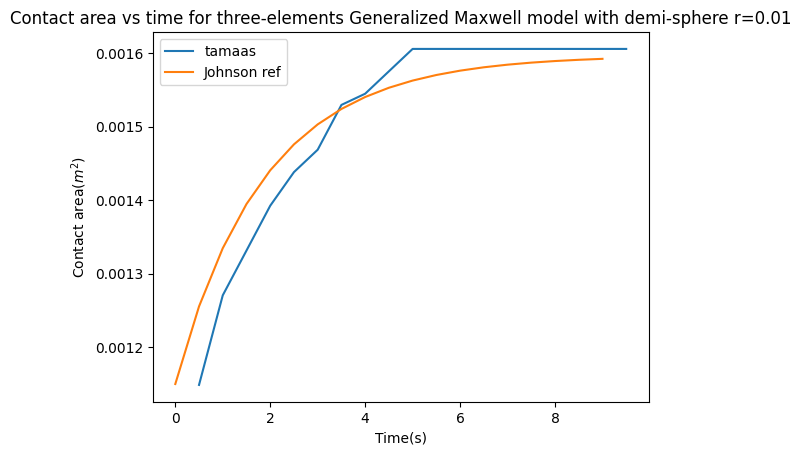

 Iter          Cost_f           Error
    0    6.358634e-05    5.810294e-04
   28    2.564035e-04    6.064668e-13
 Iter          Cost_f           Error
    0    1.122550e-04    1.956667e-04
   27    3.048596e-04    9.754414e-13
 Iter          Cost_f           Error
    0    1.413284e-04    1.741532e-04
   28    3.448770e-04    3.670131e-13
 Iter          Cost_f           Error
    0    1.652700e-04    1.386401e-04
   29    3.778192e-04    6.625221e-13
 Iter          Cost_f           Error
    0    1.850493e-04    1.095049e-04
   29    4.050309e-04    7.103426e-13
 Iter          Cost_f           Error
    0    2.013659e-04    8.879037e-05
   27    4.276663e-04    7.544536e-13
 Iter          Cost_f           Error
    0    2.149695e-04    7.320750e-05
   27    4.465687e-04    7.565617e-13
 Iter          Cost_f           Error
    0    2.263189e-04    6.174470e-05
   28    4.623926e-04    4.658909e-13
 Iter          Cost_f           Error
    0    2.358219e-04    4.762506e-05
   24    4.7

[np.float64(0.001117706298828125), np.float64(0.001239776611328125), np.float64(0.001270294189453125), np.float64(0.001331329345703125), np.float64(0.001361846923828125), np.float64(0.001422882080078125), np.float64(0.001438140869140625), np.float64(0.001468658447265625), np.float64(0.001499176025390625), np.float64(0.001529693603515625), np.float64(0.001529693603515625), np.float64(0.001544952392578125), np.float64(0.001575469970703125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125)]
[np.float64(0

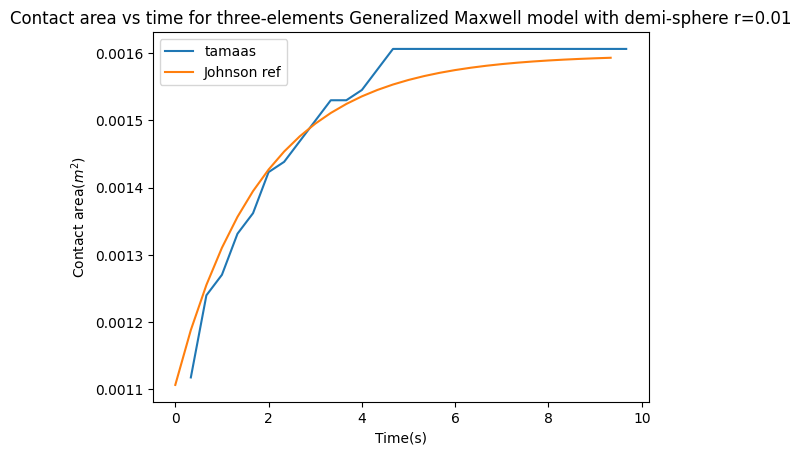

 Iter          Cost_f           Error
    0    6.322433e-05    6.002552e-04
   26    2.605069e-04    5.628253e-13
 Iter          Cost_f           Error
    0    1.026845e-04    1.442762e-04
   28    2.954394e-04    5.055172e-13
 Iter          Cost_f           Error
    0    1.254733e-04    1.160907e-04
   27    3.262647e-04    4.099368e-13
 Iter          Cost_f           Error
    0    1.455856e-04    1.145228e-04
   26    3.537001e-04    9.072528e-13
 Iter          Cost_f           Error
    0    1.633604e-04    9.682457e-05
   25    3.779639e-04    9.633147e-13
 Iter          Cost_f           Error
    0    1.790355e-04    8.632270e-05
   20    3.994772e-04    6.883971e-13
 Iter          Cost_f           Error
    0    1.929315e-04    7.570022e-05
   27    4.185809e-04    7.787414e-13
 Iter          Cost_f           Error
    0    2.052531e-04    6.206798e-05
   24    4.355736e-04    9.443971e-13
 Iter          Cost_f           Error
    0    2.162370e-04    5.664129e-05
   27    4.5

[np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001178741455078125), np.float64(0.001239776611328125), np.float64(0.001300811767578125), np.float64(0.001331329345703125), np.float64(0.001331329345703125), np.float64(0.001361846923828125), np.float64(0.001392364501953125), np.float64(0.001422882080078125), np.float64(0.001422882080078125), np.float64(0.001468658447265625), np.float64(0.001468658447265625), np.float64(0.001468658447265625), np.float64(0.001529693603515625), np.float64(0.001529693603515625), np.float64(0.001529693603515625), np.float64(0.001529693603515625), np.float64(0.001544952392578125), np.float64(0.001544952392578125), np.float64(0.001575469970703125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.001605987548828125), np.float64(0.

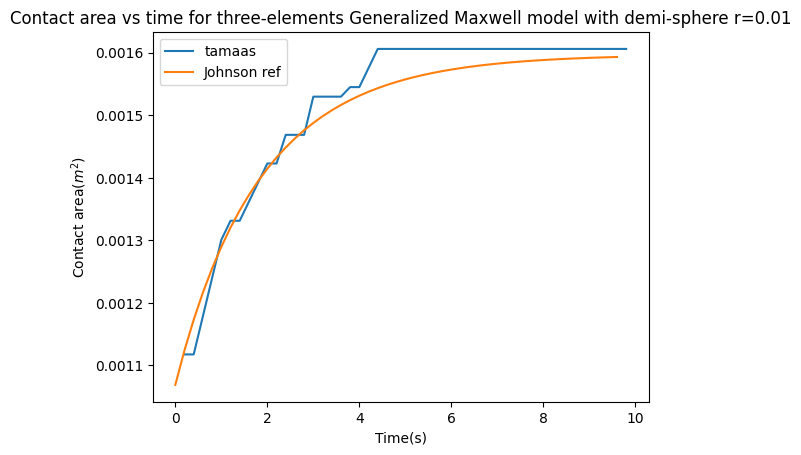

 Iter          Cost_f           Error
    0    6.296227e-05    6.112435e-04
   27    2.631358e-04    3.308775e-13
 Iter          Cost_f           Error
    0    9.540809e-05    1.000678e-04
   19    2.876243e-04    3.360649e-13
 Iter          Cost_f           Error
    0    1.119989e-04    8.868885e-05
   25    3.101334e-04    5.075450e-13
 Iter          Cost_f           Error
    0    1.273164e-04    7.713493e-05
   26    3.308918e-04    8.135502e-13
 Iter          Cost_f           Error
    0    1.414922e-04    7.881916e-05
   20    3.501662e-04    6.120065e-13
 Iter          Cost_f           Error
    0    1.546302e-04    7.313833e-05
   26    3.680557e-04    6.502344e-13
 Iter          Cost_f           Error
    0    1.667974e-04    6.389870e-05
   24    3.845771e-04    6.134926e-13
 Iter          Cost_f           Error
    0    1.780010e-04    5.966326e-05
   26    3.998677e-04    4.561943e-13
 Iter          Cost_f           Error
    0    1.883633e-04    5.472131e-05
   26    4.1

[np.float64(0.001087188720703125), np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001163482666015625), np.float64(0.001239776611328125), np.float64(0.001239776611328125), np.float64(0.001270294189453125), np.float64(0.001300811767578125), np.float64(0.001300811767578125), np.float64(0.001331329345703125), np.float64(0.001331329345703125), np.float64(0.001361846923828125), np.float64(0.001361846923828125), np.float64(0.001392364501953125), np.float64(0.001422882080078125), np.float64(0.001422882080078125), np.float64(0.001422882080078125), np.float64(0.001438140869140625), np.float64(0.001468658447265625), np.float64(0.001468658447265625), np.float64(0.001468658447265625), np.float64(0.001468658447265625), np.float64(0.001499176025390625), np.float64(0.001529693603515625), np.float64(0.001529693603515625), np.float64(0.001529693603515625), np.float64(0.001529693603515625), np.float64(0.001529693603515625), np.float64(0.001544952392578125), np.float64(0.

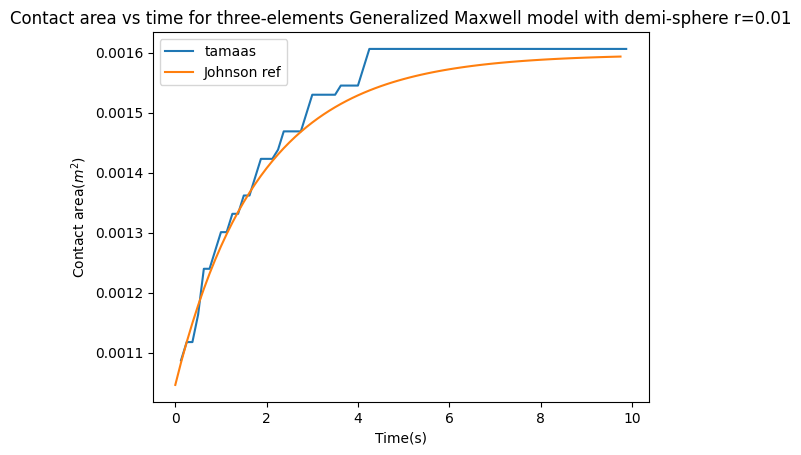

 Iter          Cost_f           Error
    0    6.288125e-05    6.150399e-04
   29    2.640891e-04    6.548202e-13
 Iter          Cost_f           Error
    0    9.260426e-05    8.016087e-05
   19    2.844541e-04    2.437365e-13
 Iter          Cost_f           Error
    0    1.065953e-04    7.605811e-05
   19    3.034996e-04    3.620141e-13
 Iter          Cost_f           Error
    0    1.197136e-04    6.792083e-05
   25    3.213016e-04    3.691219e-13
 Iter          Cost_f           Error
    0    1.319977e-04    6.068377e-05
   26    3.380006e-04    5.701663e-13
 Iter          Cost_f           Error
    0    1.435993e-04    6.370849e-05
   26    3.537282e-04    7.145976e-13
 Iter          Cost_f           Error
    0    1.544897e-04    5.942081e-05
   25    3.685677e-04    4.253146e-13
 Iter          Cost_f           Error
    0    1.647344e-04    5.437563e-05
   26    3.824660e-04    3.110961e-13
 Iter          Cost_f           Error
    0    1.743313e-04    5.172129e-05
   25    3.9

[np.float64(0.001056671142578125), np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001163482666015625), np.float64(0.001209259033203125), np.float64(0.001239776611328125), np.float64(0.001239776611328125), np.float64(0.001270294189453125), np.float64(0.001300811767578125), np.float64(0.001300811767578125), np.float64(0.001331329345703125), np.float64(0.001331329345703125), np.float64(0.001331329345703125), np.float64(0.001361846923828125), np.float64(0.001361846923828125), np.float64(0.001361846923828125), np.float64(0.001392364501953125), np.float64(0.001422882080078125), np.float64(0.001422882080078125), np.float64(0.001422882080078125), np.float64(0.001438140869140625), np.float64(0.001438140869140625), np.float64(0.001468658447265625), np.float64(0.001468658447265625), np.float64(0.001468658447265625), np.float64(0.001468658447265625), np.float64(0.001468658447265625), np.float64(0.001499176025390625), np.float64(0.

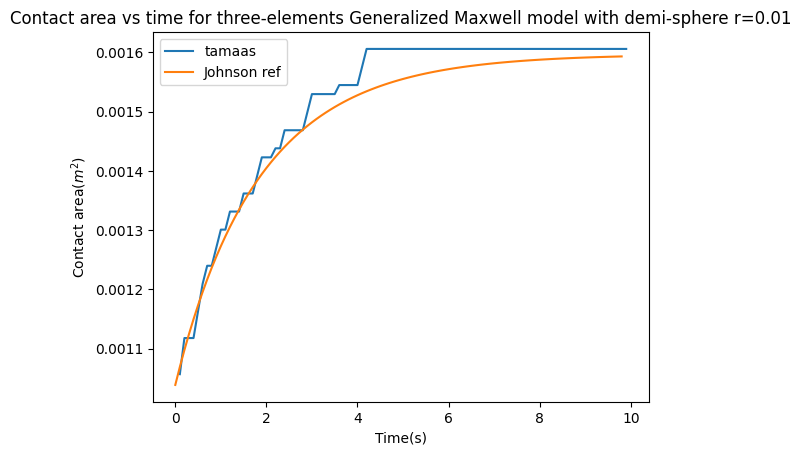

 Iter          Cost_f           Error
    0    6.275265e-05    6.200191e-04
   28    2.654260e-04    2.896708e-13
 Iter          Cost_f           Error
    0    8.839362e-05    5.472906e-05
   24    2.797106e-04    8.644099e-13
 Iter          Cost_f           Error
    0    9.849275e-05    5.470876e-05
   18    2.934204e-04    8.364825e-13
 Iter          Cost_f           Error
    0    1.081498e-04    5.162451e-05
   19    3.065129e-04    3.335695e-13
 Iter          Cost_f           Error
    0    1.173472e-04    4.780734e-05
   19    3.190195e-04    2.441741e-13
 Iter          Cost_f           Error
    0    1.261330e-04    4.429576e-05
   25    3.309759e-04    3.565944e-13
 Iter          Cost_f           Error
    0    1.345422e-04    4.104926e-05
   25    3.424273e-04    8.066594e-13
 Iter          Cost_f           Error
    0    1.426143e-04    4.379173e-05
   24    3.534313e-04    7.369809e-13
 Iter          Cost_f           Error
    0    1.504279e-04    4.147828e-05
   25    3.6

[np.float64(0.001056671142578125), np.float64(0.001087188720703125), np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001148223876953125), np.float64(0.001163482666015625), np.float64(0.001209259033203125), np.float64(0.001239776611328125), np.float64(0.001239776611328125), np.float64(0.001270294189453125), np.float64(0.001270294189453125), np.float64(0.001270294189453125), np.float64(0.001300811767578125), np.float64(0.001300811767578125), np.float64(0.001300811767578125), np.float64(0.001331329345703125), np.float64(0.001331329345703125), np.float64(0.001331329345703125), np.float64(0.001331329345703125), np.float64(0.001361846923828125), np.float64(0.001361846923828125), np.float64(0.001361846923828125), np.float64(0.001361846923828125), np.float64(0.001392364501953125), np.float64(0.001392364501953125), np.float64(0.001422882080078125), np.float64(0.001422882080078125), np.float64(0.

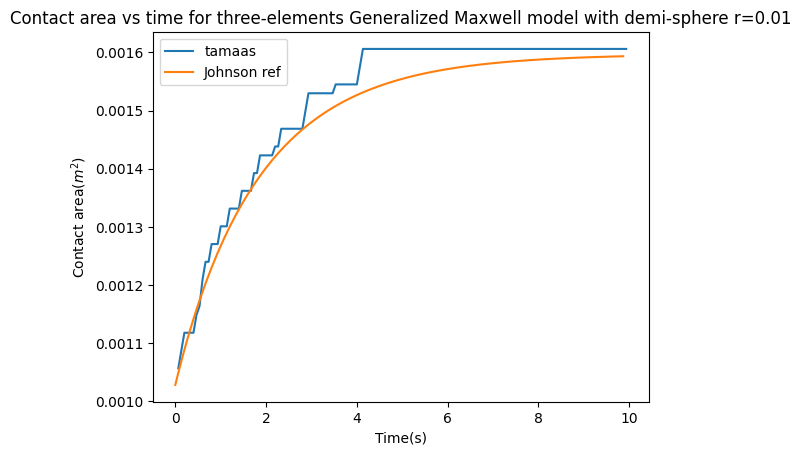

 Iter          Cost_f           Error
    0    6.265971e-05    6.241262e-04
   26    2.665398e-04    8.814344e-13
 Iter          Cost_f           Error
    0    8.459430e-05    3.450501e-05
   23    2.754929e-04    9.742605e-13
 Iter          Cost_f           Error
    0    9.107716e-05    3.288629e-05
   23    2.842068e-04    8.005475e-13
 Iter          Cost_f           Error
    0    9.736983e-05    3.389141e-05
   18    2.927153e-04    5.614471e-13
 Iter          Cost_f           Error
    0    1.034975e-04    3.295257e-05
   17    3.010021e-04    7.064983e-13
 Iter          Cost_f           Error
    0    1.094561e-04    3.143569e-05
   18    3.090586e-04    7.795417e-13
 Iter          Cost_f           Error
    0    1.152351e-04    2.999598e-05
   17    3.168938e-04    9.676252e-13
 Iter          Cost_f           Error
    0    1.208421e-04    2.862904e-05
   18    3.245159e-04    7.198590e-13
 Iter          Cost_f           Error
    0    1.262841e-04    2.733076e-05
   18    3.3

[np.float64(0.001056671142578125), np.float64(0.001056671142578125), np.float64(0.001087188720703125), np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001117706298828125), np.float64(0.001148223876953125), np.float64(0.001163482666015625), np.float64(0.001178741455078125), np.float64(0.001209259033203125), np.float64(0.001239776611328125), np.float64(0.001239776611328125), np.float64(0.001239776611328125), np.float64(0.001239776611328125), np.float64(0.001270294189453125), np.float64(0.001270294189453125), np.float64(0.001270294189453125), np.float64(0.001270294189453125), np.float64(0.001300811767578125), np.float64(0.001300811767578125), np.float64(0.001300811767578125), np.float64(0.001300811767578125), np.float64(0.001300811767578125), np.float64(0.001331329345703125), np.float64(0.

ValueError: x and y must have same first dimension, but have shapes (250,) and (249,)

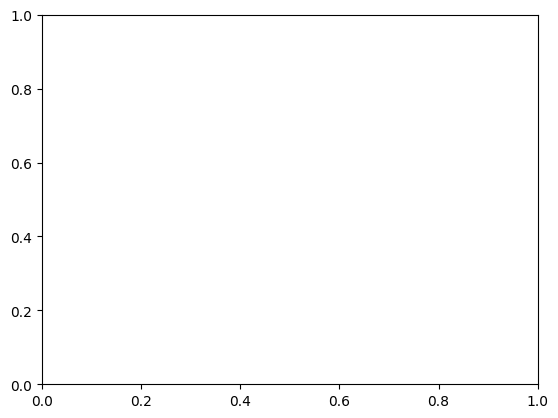

In [5]:

for time_steps in time_steps_list:
    dt = (t1 - t0) / time_steps
    Ac_tamaas = []
    Ac_Johnson_ref = []
    # Solver
    solver = tm.MaxwellViscoelastic(model, surface, 1e-12, dt, shear_modulus, characteristic_time)
    solver.reset()

    for t in np.linspace(t0, t1, time_steps):
        solver.solve(p_target)
        contact_area_result = np.mean(model.traction > 0) * L**2
        normalized_result = contact_area_result / L**2      ######normalized contact area
        Ac_tamaas.append(normalized_result)

    for t in np.arange(t0, t1, dt):        
        Ac_Johnson_ref.append((3 / 8 * Radius * Fn_Johnson * (1 / g_1 + 1 / g_2 * (1 - np.exp(-t / tau_c[0]))))**(2/3) * np.pi)


    Ac_tamaas = Ac_tamaas[:-1]
    Ac_Johnson_ref = Ac_Johnson_ref[1:]

    print(Ac_tamaas)
    print(Ac_Johnson_ref)
    print(len(Ac_tamaas))
    print(len(Ac_Johnson_ref))

    '''
    # Calculate L2 norm between Ac_tamaas and Ac_Johnson_ref
    L2_error = np.sqrt(np.sum((np.array(Ac_tamaas) - np.array(Ac_Johnson_ref))**2))

    # normalize L2 error
    L2_error /= np.sqrt(len(Ac_tamaas))   
    '''
    L2_error = np.linalg.norm(np.array(Ac_tamaas) - np.array(Ac_Johnson_ref)) / np.sqrt(len(Ac_tamaas))

    L2_norms.append(L2_error)

    plt.plot(np.arange(t0, t1-dt, dt)+dt, Ac_tamaas)
    plt.plot(np.arange(t0, t1-dt, dt), Ac_Johnson_ref)
    #plt.axhline(Ac_hertz_t0, color='red', linestyle='dotted')
    #plt.axhline(Ac_hertz_t_inf, color='blue', linestyle='dotted')
    plt.xlabel("Time(s)")
    plt.ylabel("Contact area($m^2$)")
    plt.legend(["tamaas","Johnson ref", "Hertz at t=0", "Hertz at t=inf"])
    #define a title that can read parameter tau_0
    plt.title("Contact area vs time for three-elements Generalized Maxwell model with demi-sphere r=0.01")
    #plt.axhline(Ac_hertz_t_inf, color='blue')
    plt.show()